# Fake-Real News Detector

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import zipfile
import itertools
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [3]:
zf1 = zipfile.ZipFile('train.csv.zip')
df4 = pd.read_csv(zf1.open('train.csv'))

In [4]:
df4.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df4.dropna(inplace=True)
df4

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
labels4 = df4.label

In [7]:
labels4.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [8]:
zf = zipfile.ZipFile('test.csv.zip')
df2 = pd.read_csv(zf.open('test.csv'))

In [9]:
df2.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [10]:
df2.shape

(5200, 4)

In [11]:
df2

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [12]:
l = df2.loc[pd.isna(df2['text']), :].index
l

Int64Index([589, 626, 978, 2257, 2892, 4736, 5092], dtype='int64')

In [13]:
d = df2.drop(l)
d

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [14]:
df3 = pd.read_csv('submit.csv')
df3

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
...,...,...
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1


In [15]:
d1 = df3.drop(l)
d1

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
...,...,...
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1


In [16]:
x_train2, x_test2 = df4['text'], d['text'] 
y_train2, y_test2 = labels4, d1['label']

In [17]:
x_train2

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object

In [18]:
y_train2

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [19]:
x_test2

0       PALO ALTO, Calif.  —   After years of scorning...
1       Russian warships ready to strike terrorists ne...
2       Videos #NoDAPL: Native American Leaders Vow to...
3       If at first you don’t succeed, try a different...
4       42 mins ago 1 Views 0 Comments 0 Likes 'For th...
                              ...                        
5195    Of all the dysfunctions that plague the world’...
5196    WASHINGTON  —   Gov. John Kasich of Ohio on Tu...
5197    Good morning. (Want to get California Today by...
5198    « Previous - Next » 300 US Marines To Be Deplo...
5199    Perhaps you’ve seen the new TV series whose pi...
Name: text, Length: 5193, dtype: object

In [20]:
y_test2

0       0
1       1
2       0
3       1
4       1
       ..
5195    0
5196    1
5197    0
5198    1
5199    0
Name: label, Length: 5193, dtype: int64

In [23]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train2 = tfidf_vectorizer2.fit_transform(x_train2) 
tfidf_test2 = tfidf_vectorizer2.transform(x_test2)

In [31]:
pac2 = PassiveAggressiveClassifier(max_iter=100)
pac2.fit(tfidf_train2, y_train2)
#Predict on the test set and calculate accuracy
y_pred2 = pac2.predict(tfidf_test2)
score2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {round(score2 * 100, 2)}%')

Accuracy: 63.08%


In [34]:
confusion_matrix(y_test2 ,y_pred2 , labels=[1,0])

array([[1746, 1108],
       [ 809, 1530]], dtype=int64)

In [45]:
#Logistic regression classification
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model_lr = pipe1.fit(x_train2, y_train2)
lr_pred = model_lr.predict(x_test2)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test2, lr_pred)*100,2)))
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test2, lr_pred))
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test2, lr_pred))


Accuracy of Logistic Regression Classifier: 63.24%

Confusion Matrix of Logistic Regression Classifier:

[[1564  775]
 [1134 1720]]

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.58      0.67      0.62      2339
           1       0.69      0.60      0.64      2854

    accuracy                           0.63      5193
   macro avg       0.63      0.64      0.63      5193
weighted avg       0.64      0.63      0.63      5193



In [46]:
#Support Vector classification
pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

model_svc = pipe2.fit(x_train2, y_train2)
svc_pred = model_svc.predict(x_test2)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test2, svc_pred)*100,2)))
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test2, svc_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test2, svc_pred))

Accuracy of SVM Classifier: 63.26%

Confusion Matrix of SVM Classifier:

[[1537  802]
 [1106 1748]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      2339
           1       0.69      0.61      0.65      2854

    accuracy                           0.63      5193
   macro avg       0.63      0.63      0.63      5193
weighted avg       0.64      0.63      0.63      5193



In [44]:
#Naive-Bayes classification
pipe3 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

model_nb = pipe3.fit(x_train2, y_train2)
nb_pred = model_nb.predict(x_test2)

print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(y_test2, nb_pred)*100,2)))
print("\nConfusion Matrix of Naive Bayes Classifier:\n")
print(confusion_matrix(y_test2, nb_pred))
print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(y_test2, nb_pred))

Accuracy of Naive Bayes Classifier: 55.13%

Confusion Matrix of Naive Bayes Classifier:

[[2148  191]
 [2139  715]]

Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

           0       0.50      0.92      0.65      2339
           1       0.79      0.25      0.38      2854

    accuracy                           0.55      5193
   macro avg       0.65      0.58      0.51      5193
weighted avg       0.66      0.55      0.50      5193



In [38]:
tfidf_unigram_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
sgdc_unigram_tfidf_classifier = SGDClassifier()
svc_unigram_tfidf_classifier = LinearSVC(C=1.0, max_iter=1000)
pipeline = Pipeline([('vectorizer', tfidf_unigram_vectorizer), ('classifier', sgdc_unigram_tfidf_classifier)])

In [40]:
pipeline.fit(x_train2, y_train2)
print(pipeline.score(x_test2, y_test2))

0.6323897554400154


# 2.

In [1]:
import itertools
import re

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import joblib
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
import zipfile

In [6]:
zf = zipfile.ZipFile('train.csv.zip')
df_train = pd.read_csv(zf.open('train.csv'))
df_train.head(6)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0


In [7]:
#Check for missing values; remove rows with both text and title empty

print("Size of dataframe before cleanup: " + str(len(df_train)))
df_train.isnull().values.any()
df_train.dropna(axis=0, how='all', subset=['text', 'title'], inplace=True)
print("Size of dataframe after cleanup: " + str(len(df_train)))

Size of dataframe before cleanup: 20800
Size of dataframe after cleanup: 20800


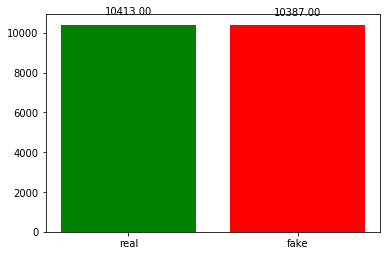

In [9]:
#Compare fake and real training dataset size to check if distribution is even/skewed

values = df_train['label'].value_counts()
plt.bar(x=["real", "fake"], height=values, color=["green", "red"])
for x,y in zip(["real", "fake"],values):

    label = "{:.2f}".format(y)

    plt.annotate(label, # text
                 (x,y), # point to label
                 textcoords="offset points", # text position
                 xytext=(0,10), # distance from text to points
                 ha='center') # horizontal alignment
plt.show()

In [10]:
#Extract real data; rows with label = 0

df_reliable = df_train.loc[df_train['label'] == 0]
df_reliable.head(6)

,id,title,author,text,label
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0


In [11]:
#Extract real data; rows with label = 1

df_fake = df_train.loc[df_train['label'] == 1]
df_fake.head(6)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
12,12,Russian Researchers Discover Secret Nazi Milit...,Amando Flavio,The mystery surrounding The Third Reich and Na...,1


In [12]:
#Check authors' distribution

df_train.groupby('label')['author'].nunique()

label
0    2225
1    1981
Name: author, dtype: int64

In [13]:
df_reliable['author'].value_counts()

Pam Key                                                               242
Jerome Hudson                                                         166
Charlie Spiering                                                      141
John Hayward                                                          140
Katherine Rodriguez                                                   124
                                                                     ... 
Rollo Romig                                                             1
Adam Goldman and Eric Schmitt                                           1
Dennis Overbye, Kenneth Chang, Nicholas St. Fleur and Denise Grady      1
Laurie Goodstein and Anemona Hartocollis                                1
Penn Bullock and Sandra Stevenson                                       1
Name: author, Length: 2225, dtype: int64

In [14]:
df_fake['author'].value_counts()

admin                           193
Pakalert                         86
Eddy Lavine                      85
Starkman                         84
Gillian                          82
                               ... 
Hawkeyerightsmart                 1
Dudleydooright                    1
Luz Marina Fornieles Sánchez      1
Jdhank                            1
Sami Jamil Jadallah               1
Name: author, Length: 1981, dtype: int64

In [15]:
#Add custom field article that combines text and title into same column article

df_train['article'] = df_train['title'] + ' ' + df_train['text']
df_train.drop(columns=['title', 'text'], inplace = True)
df_train.head(6)

,id,author,label,article
0,0,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Consortiumnews.com,1,Why the Truth Might Get You Fired Why the Trut...
3,3,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...
5,5,Daniel Nussbaum,0,Jackie Mason: Hollywood Would Love Trump if He...


In [16]:
#Clean up and preprocess data

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocessArticle(article):
    #Clean sentence to remove any punctuations, convert to lower case
    cleaned_sentence = re.sub(r'[^\w\s]', '', str(article).lower())
    #Tokenize sentence into words
    words = nltk.word_tokenize(cleaned_sentence)
    #Remove stop words and words with length less than equal to 3
    filtered_words = [word for word in words if not word in stop_words and len(word) > 3]
    #Lemmatize
    output_sentence = ''
    for word in filtered_words:
        output_sentence = output_sentence  + ' ' + str(lemmatizer.lemmatize(word))
    
    return output_sentence

In [18]:
for index, row in df_train.iterrows():
    cleaned_sentence = preprocessArticle(str(row['article']))
    df_train.loc[index, 'cleaned_article'] = cleaned_sentence

df_train.head(6)

,id,author,label,article,cleaned_article
0,0,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...,house aide didnt even comeys letter jason cha...
1,1,Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillary clinton woman campus breitbart ...
2,2,Consortiumnews.com,1,Why the Truth Might Get You Fired Why the Trut...,truth might fired truth might fired october 2...
3,3,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...,civilian killed single airstrike identified v...
4,4,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...,iranian woman jailed fictional unpublished st...
5,5,Daniel Nussbaum,0,Jackie Mason: Hollywood Would Love Trump if He...,jackie mason hollywood would love trump bombe...


In [19]:
#Sentiment analysis to see polarity difference if any between fake and real articles

df_reliable = df_train.loc[df_train['label'] == 0]
df_fake = df_train.loc[df_train['label'] == 1]

cleaned_reliable_articles = list(df_reliable['cleaned_article'])
cleaned_fake_articles = list(df_fake['cleaned_article'])

sentimentAnalyzer = SentimentIntensityAnalyzer()

#Sentiment analysis for reliable articles
sentimentscores = []
for i in cleaned_reliable_articles:
    score = sentimentAnalyzer.polarity_scores(i)
    score['article'] = i
    sentimentscores.append(score)
    
sentimentdf_reliable = pd.DataFrame(sentimentscores)

#Sentiment analysis for fake articles
sentimentscores = []
for i in cleaned_fake_articles:
    score = sentimentAnalyzer.polarity_scores(i)
    score['article'] = i
    sentimentscores.append(score)
    
sentimentdf_fake = pd.DataFrame(sentimentscores)

In [20]:
sentimentdf_reliable.head(6)

,neg,neu,pos,compound,article
0,0.142,0.686,0.172,0.8979,flynn hillary clinton woman campus breitbart ...
1,0.137,0.658,0.205,0.9094,jackie mason hollywood would love trump bombe...
2,0.039,0.748,0.213,0.9975,benoît hamon win french socialist party presi...
3,0.044,0.679,0.277,0.9995,excerpt draft script donald trump qampa black...
4,0.079,0.768,0.153,0.9968,backchannel plan ukraine russia courtesy trum...
5,0.078,0.846,0.076,-0.5318,obamas organizing action partner soroslinked ...


In [21]:
sentimentdf_fake.head(6)

,neg,neu,pos,compound,article
0,0.084,0.827,0.089,-0.3213,house aide didnt even comeys letter jason cha...
1,0.114,0.657,0.229,0.9979,truth might fired truth might fired october 2...
2,0.370,0.571,0.058,-0.9988,civilian killed single airstrike identified v...
3,0.246,0.716,0.038,-0.9753,iranian woman jailed fictional unpublished st...
4,0.014,0.781,0.205,0.9957,life life luxury elton john favorite shark pi...
5,0.102,0.818,0.080,-0.8316,russian researcher discover secret nazi milit...


In [22]:
sentimentdf_reliable.drop(columns=['article'], inplace = True)
average_sentiment_reliable = sentimentdf_reliable.mean()

sentimentdf_fake.drop(columns=['article'], inplace = True)
average_sentiment_fake = sentimentdf_fake.mean()


Sentiment_analysis..



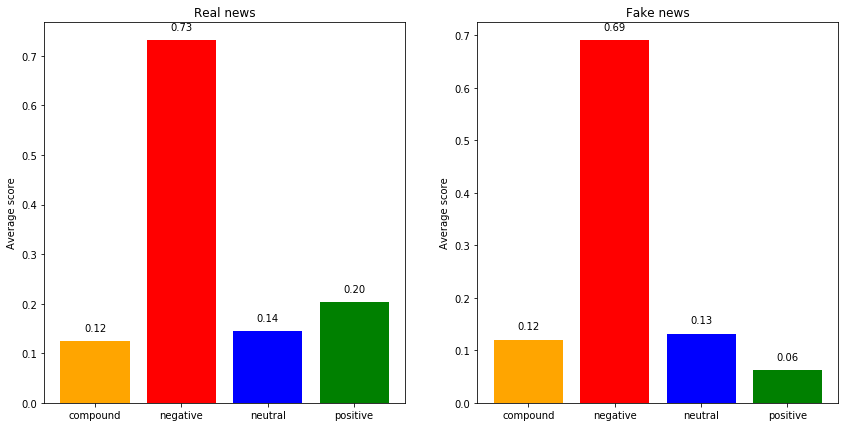

In [23]:
print("\nSentiment_analysis..\n")
names = ['compound', 'negative', 'neutral','positive']
colors=["orange", "red", "blue" , "green"]

plt.figure(figsize=(22, 7))
plt.subplot(131)
plt.bar(names,average_sentiment_reliable, color=colors)
plt.title("Real news")
plt.ylabel("Average score")
# zip joins x and y coordinates in pairs
for x,y in zip(names,average_sentiment_reliable):

    label = "{:.2f}".format(y)

    plt.annotate(label, # text
                 (x,y), # point to label
                 textcoords="offset points", # text position
                 xytext=(0,10), # distance from text to points
                 ha='center') # horizontal alignment
plt.subplot(132)
plt.bar(names,average_sentiment_fake, color=colors)
plt.title("Fake news")
plt.ylabel("Average score")
for x,y in zip(names,average_sentiment_fake):

    label = "{:.2f}".format(y)

    plt.annotate(label, # text
                 (x,y), # point to label
                 textcoords="offset points", # text position
                 xytext=(0,10), # distance from text to points
                 ha='center') # horizontal alignment

plt.show()

# Vectorization

In [25]:
df_x = df_train['cleaned_article']
df_y = df_train['label']
df_x.head(6)
df_y.head(6)

0    1
1    0
2    1
3    1
4    1
5    0
Name: label, dtype: int64

In [28]:
#Unigram and bigram term frequency matrix

count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,2))
count_vectorizer.fit(df_x)
bigram_term_freq_matrix = count_vectorizer.transform(df_x)
print("\nbigram_term_freq_matrix:")
print(bigram_term_freq_matrix)


bigram_term_freq_matrix:
  (0, 28347)	1
  (0, 29066)	1
  (0, 34949)	2
  (0, 35902)	1
  (0, 38032)	1
  (0, 44480)	1
  (0, 44481)	1
  (0, 56445)	1
  (0, 56473)	1
  (0, 63958)	1
  (0, 64028)	1
  (0, 71733)	3
  (0, 71823)	1
  (0, 72851)	1
  (0, 73917)	1
  (0, 87221)	1
  (0, 87468)	1
  (0, 95347)	1
  (0, 96758)	1
  (0, 116792)	1
  (0, 117170)	1
  (0, 134246)	1
  (0, 135861)	1
  (0, 146535)	6
  (0, 146780)	2
  :	:
  (20799, 4211907)	1
  (20799, 4211908)	1
  (20799, 4221522)	1
  (20799, 4221523)	1
  (20799, 4221573)	1
  (20799, 4221574)	1
  (20799, 4221640)	1
  (20799, 4221641)	1
  (20799, 4221729)	1
  (20799, 4221730)	1
  (20799, 4222199)	1
  (20799, 4222200)	1
  (20799, 4222201)	1
  (20799, 4222202)	1
  (20799, 4222209)	1
  (20799, 4222210)	1
  (20799, 4222536)	1
  (20799, 4222537)	1
  (20799, 4226398)	4
  (20799, 4227909)	1
  (20799, 4229251)	1
  (20799, 4231063)	1
  (20799, 4233293)	1
  (20799, 4241123)	1
  (20799, 4241267)	1


In [29]:
#Unigram and bigram tf-idf matrix

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(bigram_term_freq_matrix)
bigram_tfidf_matrix = tfidf_transformer.transform(bigram_term_freq_matrix)
print("\nbigram_tfidf_matrix:")
print(bigram_tfidf_matrix)


bigram_tfidf_matrix:
  (0, 4235378)	0.03241195639621523
  (0, 4235376)	0.032105218768387074
  (0, 4234389)	0.02726253028841198
  (0, 4226398)	0.006356431508144326
  (0, 4203725)	0.039278291446639475
  (0, 4203297)	0.039278291446639475
  (0, 4203252)	0.028926605886906633
  (0, 4203031)	0.07544895675110866
  (0, 4202997)	0.03241195639621523
  (0, 4202694)	0.04662074613139837
  (0, 4198527)	0.039278291446639475
  (0, 4195182)	0.039278291446639475
  (0, 4194245)	0.03576690541704199
  (0, 4194182)	0.024672860548193117
  (0, 4185834)	0.039278291446639475
  (0, 4184095)	0.008663500135815693
  (0, 4162666)	0.039278291446639475
  (0, 4162665)	0.039278291446639475
  (0, 4134832)	0.03772447837555433
  (0, 4134300)	0.013783359013659992
  (0, 4130013)	0.039278291446639475
  (0, 4128818)	0.011176867224256417
  (0, 4127302)	0.030089138191623857
  (0, 4123501)	0.008134356497938377
  (0, 4121440)	0.0315568313562873
  :	:
  (20799, 149211)	0.019908571714262947
  (20799, 91550)	0.05670428718457794
  (20

# Split data into train/test groups

In [30]:
#Unigram and bigram term frequency matrix split

train_x_bigram_tf, test_x_bigram_tf, train_y_bigram_tf, test_y_bigram_tf = train_test_split(bigram_term_freq_matrix, df_y)

In [31]:
#Unigram and bigram tf-idf matrix split

train_x_bigram_tfidf, test_x_bigram_tfidf, train_y_bigram_tfidf, test_y_bigram_tfidf = train_test_split(bigram_tfidf_matrix, df_y)

# TRAINING

In [32]:
metrics = {}
attributes = ["accuracy", "precision(macro)", "precision(micro)", "recall(macro)", "recall(micro)", "f1_score(macro)", "f1_score(micro)"]

In [33]:
def assess_model_performance(classifier_model, test_x, test_y, name):
    true_y = test_y
    pred_y = classifier_model.predict(test_x)
    #Compute metrics
    accuracy = "%0.2f" % (classifier_model.score(test_x, true_y)*100) + "%"
    precision_macro = "%0.3f" % (precision_score(true_y, pred_y, average='macro'))
    precision_micro = "%0.3f" % (precision_score(true_y, pred_y, average='micro'))
    recall_macro = "%0.3f" %(recall_score(true_y, pred_y, average='macro'))
    recall_micro = "%0.3f" %(recall_score(true_y, pred_y, average='micro'))
    f1_macro = "%0.3f" %(f1_score(true_y, pred_y, average='macro'))
    f1_micro = "%0.3f" %(f1_score(true_y, pred_y, average='micro'))
    print("Accuracy: " + accuracy)
    print("Precision (macro): " + precision_macro)
    print("Precision (micro): " + precision_micro)
    print("Recall (macro): " + recall_macro)
    print("Recall (micro): " + recall_micro)
    print("F1Score (macro): " + f1_macro)
    print("F1Score (micro): " + f1_micro)
    
    #Add metrics to comparison data
    metrics[name] = pd.Series([accuracy, precision_macro, precision_micro, recall_macro, recall_micro, f1_macro, f1_micro], index=attributes)
    
    #Confusion matrix plot
    plot_confusion_matrix(classifier_model, test_x, true_y, display_labels=['RELIABLE', 'FAKE'], values_format="d")
    disp = plot_precision_recall_curve(classifier_model, test_x, true_y)
    disp.ax_.set_title('Precision-Recall curve')


With smoothing, using unigram and bigram tf-idf:
Accuracy: 80.38%
Precision (macro): 0.859
Precision (micro): 0.804
Recall (macro): 0.801
Recall (micro): 0.804
F1Score (macro): 0.795
F1Score (micro): 0.804


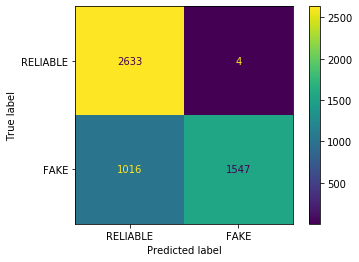

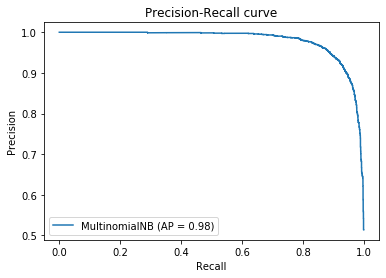

In [34]:
print("\nWith smoothing, using unigram and bigram tf-idf:")
mnb_smoothing_bigram_tfidf = MultinomialNB(alpha=1.0)
mnb_smoothing_bigram_tfidf.fit(train_x_bigram_tfidf, train_y_bigram_tfidf)
assess_model_performance(mnb_smoothing_bigram_tfidf, test_x_bigram_tfidf, test_y_bigram_tfidf, "Multinomial naive bayes (TFIDF/Uni-bigram/Smoothing)")

In [35]:
#SVM (Linear SVC)

print("Linear SVC...")

Linear SVC...



With linear kernel, standard regularization (inversely proportional to C) set to 1.0, using unigram and bigram tf-idf:
Accuracy: 95.85%
Precision (macro): 0.958
Precision (micro): 0.958
Recall (macro): 0.959
Recall (micro): 0.958
F1Score (macro): 0.958
F1Score (micro): 0.958


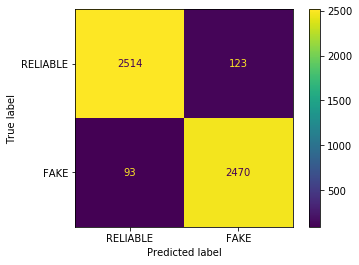

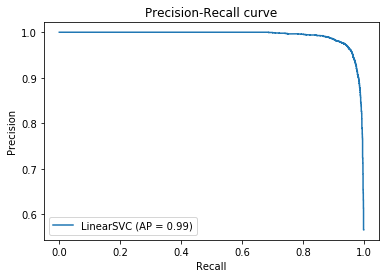

In [37]:
print("\nWith linear kernel, standard regularization (inversely proportional to C) set to 1.0, using unigram and bigram tf-idf:")

linear_svc_c1_bigram_tfidf = LinearSVC(C=1.0, max_iter=1000)
linear_svc_c1_bigram_tfidf.fit(train_x_bigram_tfidf, train_y_bigram_tfidf)
assess_model_performance(linear_svc_c1_bigram_tfidf, test_x_bigram_tfidf, test_y_bigram_tfidf, "Linear SVC (TFIDF/Uni-bigram)")

In [39]:
#SGDC

print("SGDC...")

SGDC...



Using unigram and bigram tf-idf:
Accuracy: 95.40%
Precision (macro): 0.954
Precision (micro): 0.954
Recall (macro): 0.954
Recall (micro): 0.954
F1Score (macro): 0.954
F1Score (micro): 0.954


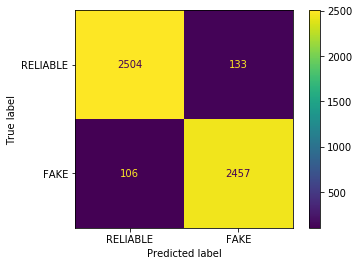

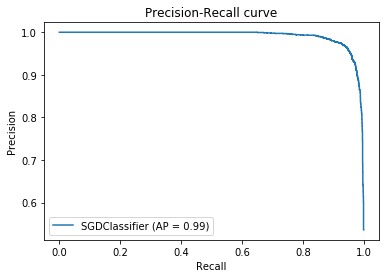

In [40]:
print("\nUsing unigram and bigram tf-idf:")
sgdc_bigram_tfidf = SGDClassifier()
sgdc_bigram_tfidf.fit(train_x_bigram_tfidf, train_y_bigram_tfidf)
assess_model_performance(sgdc_bigram_tfidf, test_x_bigram_tfidf, test_y_bigram_tfidf, "SGDC (TFIDF/Uni-bigram)")

In [41]:
#DECISION TREE

print("Decision Tree...")

Decision Tree...



Using unigram and bigram tf-idf:
Accuracy: 95.48%
Precision (macro): 0.955
Precision (micro): 0.955
Recall (macro): 0.955
Recall (micro): 0.955
F1Score (macro): 0.955
F1Score (micro): 0.955


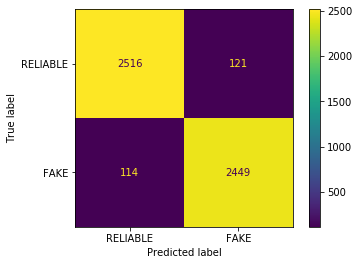

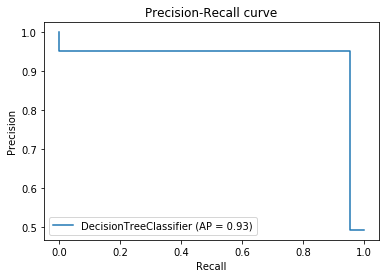

In [42]:
print("\nUsing unigram and bigram tf-idf:")
dtree_bigram_tfidf = DecisionTreeClassifier()
dtree_bigram_tfidf.fit(train_x_bigram_tfidf, train_y_bigram_tfidf)
assess_model_performance(dtree_bigram_tfidf, test_x_bigram_tfidf, test_y_bigram_tfidf, "Decision Tree (TFIDF/Uni-bigram)")

In [43]:
df_metrics = pd.DataFrame(metrics)
df_metrics.transpose()

,accuracy,precision(macro),precision(micro),recall(macro),recall(micro),f1_score(macro),f1_score(micro)
Multinomial naive bayes (TFIDF/Uni-bigram/Smoothing),80.38%,0.859,0.804,0.801,0.804,0.795,0.804
Linear SVC (TFIDF/Uni-bigram),95.85%,0.958,0.958,0.959,0.958,0.958,0.958
SGDC (TFIDF/Uni-bigram),95.40%,0.954,0.954,0.954,0.954,0.954,0.954
Decision Tree (TFIDF/Uni-bigram),95.48%,0.955,0.955,0.955,0.955,0.955,0.955



With linear kernel, standard regularization (inversely proportional to C) set to 1.0, using unigram and bigram tf-idf:
Accuracy: 95.85%
Precision (macro): 0.958
Precision (micro): 0.958
Recall (macro): 0.959
Recall (micro): 0.958
F1Score (macro): 0.958
F1Score (micro): 0.958


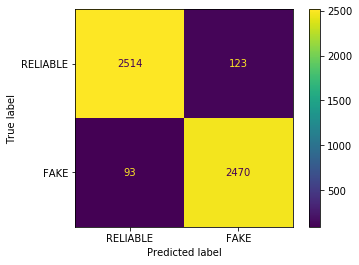

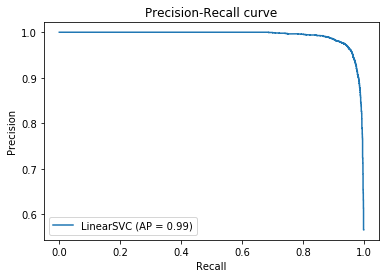

In [44]:
print("\nWith linear kernel, standard regularization (inversely proportional to C) set to 1.0, using unigram and bigram tf-idf:")

linear_svc_c1_bigram_tfidf = LinearSVC(C=1.0, max_iter=1000)
linear_svc_c1_bigram_tfidf.fit(train_x_bigram_tfidf, train_y_bigram_tfidf)
assess_model_performance(linear_svc_c1_bigram_tfidf, test_x_bigram_tfidf, test_y_bigram_tfidf, "Linear SVC (TFIDF/Uni-bigram)")

In [45]:
#Pick final model (svc unigram tfidf classifier) based on performance assessment, create pipeline and export trained model

tfidf_unigram_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
sgdc_unigram_tfidf_classifier = SGDClassifier()
svc_unigram_tfidf_classifier = LinearSVC(C=1.0, max_iter=1000)
pipeline = Pipeline([('vectorizer', tfidf_unigram_vectorizer), ('classifier', sgdc_unigram_tfidf_classifier)])
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, random_state=0)
pipeline.fit(X_train, Y_train)
print(pipeline.score(X_test, Y_test))

0.9559615384615384


In [48]:
joblib.dump(pipeline, 'trained_model.pkl', compress=True)

['trained_model.pkl']

In [50]:
#Load saved model
classifier = joblib.load('trained_model.pkl')

In [46]:
prediction_mapper = {0:"RELIABLE", 1:"FAKE"}

In [51]:
#Sample test

title = "Keiser Report: Meme Wars (E995)"
text = "42 mins ago 1 Views 0 Comments 0 Likes 'For the first time in history, we‚Äôre filming a panoramic video from the station. It means you‚Äôll see everything we see here, with your own eyes. That‚Äôs to say, you‚Äôll be able to feel like real cosmonauts' - Borisenko to RT. Video presented by RT in collaboration with the Russian space agency Roscosmos and the rocket and space corporation Energia More on our project website: space360.rt.com   Subscribe   Like     Leave a Reply Login with your Social ID Your email address will not be published. Name";
article = preprocessArticle(str(title) + str(text))
print("Input: " + article)
predict = classifier.predict(pd.Series(article))
for prediction in predict:
    print("Prediction: " + prediction_mapper.get(prediction))


Input:  keiser report meme war e99542 min view comment like first time history weäôre filming panoramic video station mean youäôll everything eye thatäôs youäôll able feel like real cosmonaut borisenko video presented collaboration russian space agency roscosmos rocket space corporation energia project website space360rtcom subscribe like leave reply login social email address published name
Prediction: FAKE


In [53]:
#Read test data (for Kaggle submission)

zf1 = zipfile.ZipFile('test.csv.zip')
df_test = pd.read_csv(zf1.open('test.csv'))
df_test.head(6)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...


In [54]:
#Preprocess test data

for index, row in df_test.iterrows():
    cleaned_sentence = preprocessArticle(str(row['title']) + str(row['text']))
    df_test.loc[index, 'cleaned_article'] = cleaned_sentence

df_test.head(6)

,id,title,author,text,cleaned_article
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",specter trump loosens tongue purse string sil...
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near a...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl native american leader stay winter fil...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",tebow attempt another comeback time baseball ...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e99542 min view commen...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...,trump usa antique hero clinton next president...


In [55]:
#Get predictions on articles in test file

predict = classifier.predict(df_test['cleaned_article'])
results = []
for prediction in predict:
    results.append(prediction_mapper.get(prediction))
print(results[:10])

['RELIABLE', 'FAKE', 'FAKE', 'RELIABLE', 'FAKE', 'FAKE', 'RELIABLE', 'FAKE', 'FAKE', 'FAKE']


In [56]:
test_id=df_test["id"]
print(test_id)

0       20800
1       20801
2       20802
3       20803
4       20804
        ...  
5195    25995
5196    25996
5197    25997
5198    25998
5199    25999
Name: id, Length: 5200, dtype: int64


In [57]:
#Create final submission dataframe

submit_df = pd.DataFrame({"id":test_id,
                         "label":predict})
submit_df.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [58]:
submit_df.to_csv("submit.csv", index=False)

In [59]:
df_metrics.transpose().to_csv("performance_metrics.csv", index=True)

In [ ]:
SGDClassifier()

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [74]:
#Pick final model (svc unigram tfidf classifier) based on performance assessment, create pipeline and export trained model

tfidf_unigram_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
sgdc_unigram_tfidf_classifier = PassiveAggressiveClassifier(max_iter=100)
svc_unigram_tfidf_classifier = LinearSVC(C=1.0, max_iter=1000)
pipeline = Pipeline([('vectorizer', tfidf_unigram_vectorizer), ('classifier', sgdc_unigram_tfidf_classifier)])
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, random_state=0)
pipeline.fit(X_train, Y_train)
print(pipeline.score(X_test, Y_test))

0.9594230769230769
